# Prepare DNS Logs

In order to demonstrate the model, this notebook prepares for us a DNS logs dataframe and csv. Towards the bottom, you will notice a few DGA domains are injected to the dataframe for demonstrative purposes. Thanks to SecRepo, we have a Bro DNS log file, however it needs a bit of wrangling with the help of Python before we can use it.

The schema and origin of the log file can be accessed [here](https://www.secrepo.com/Datasets%20Description/Network/dns.html) 

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Parses Bro DNS log file into a labelled csv file
cwd = os.getcwd()
with open('data/dns.csv', 'w') as out_file, gzip.open('data/dns.log.gz', 'r') as in_file:
    writer = csv.writer(out_file)
    writer.writerow(['ts', 'uid', 'id_orig_h', 'id_orig_p', 'id_resp_h', 'id_resp_p', 'proto', 'port', 'query', 'qclass', 'qclass_name', 'qtype', 'qtype_name', 'rcode', 'rcode_name', 'QR', 'AA', 'TC', 'RD', 'Z', 'answers', 'TTLs', 'rejected'])
    for line in in_file:
        columns = re.split(b'\t+', line)
        writer.writerow([i.decode("utf-8") for i in columns])
    print("DNS logs csv created.")

DNS logs csv created.


In [14]:
# Read in logs
dns_logs = pd.read_csv('data/dns.csv')

In [15]:
# Take a peek at the data
dns_logs.head()

,ts,uid,id_orig_h,id_orig_p,id_resp_h,id_resp_p,proto,port,query,qclass,...,rcode,rcode_name,QR,AA,TC,RD,Z,answers,TTLs,rejected
0,1.331901e+09,CWGtK431H9XuaTN4fi,192.168.202.100,45658,192.168.27.203,137,udp,33008,*\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\...,1,...,0,NOERROR,F,F,F,F,1,-,-,F\r\n
1,1.331901e+09,C36a282Jljz7BsbGH,192.168.202.76,137,192.168.202.255,137,udp,57402,HPE8AA67,1,...,-,-,F,F,T,F,1,-,-,F\r\n
2,1.331901e+09,C36a282Jljz7BsbGH,192.168.202.76,137,192.168.202.255,137,udp,57402,HPE8AA67,1,...,-,-,F,F,T,F,1,-,-,F\r\n
3,1.331901e+09,C36a282Jljz7BsbGH,192.168.202.76,137,192.168.202.255,137,udp,57402,HPE8AA67,1,...,-,-,F,F,T,F,1,-,-,F\r\n
4,1.331901e+09,C36a282Jljz7BsbGH,192.168.202.76,137,192.168.202.255,137,udp,57398,WPAD,1,...,-,-,F,F,T,F,1,-,-,F\r\n


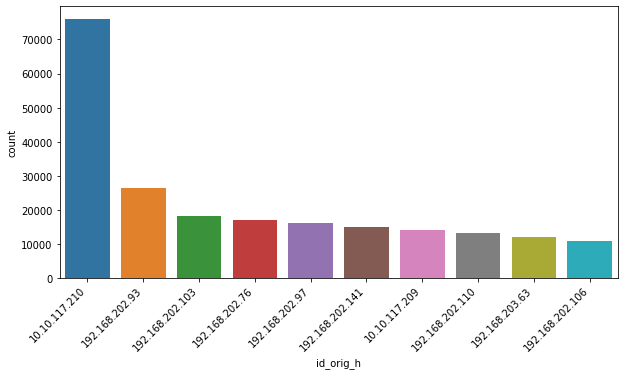

In [28]:
# Take a look at the top 10 origin IPs (fat head/chunky middle analysis)
plt.figure(figsize=(10,5))
plot = sns.countplot(x="id_orig_h", data=dns_logs, order=dns_logs['id_orig_h'].value_counts()[:10].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right');

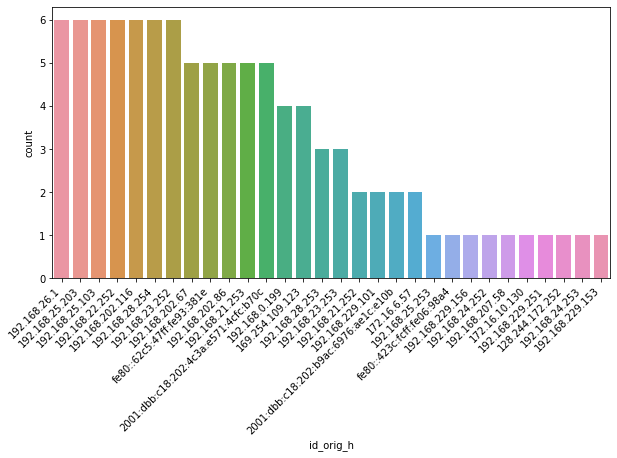

In [27]:
# Take a look at the bottom 30 origin IPs (long tail)
plt.figure(figsize=(10,5))
plot = sns.countplot(x="id_orig_h", data=dns_logs, order=dns_logs['id_orig_h'].value_counts()[-30:].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right');

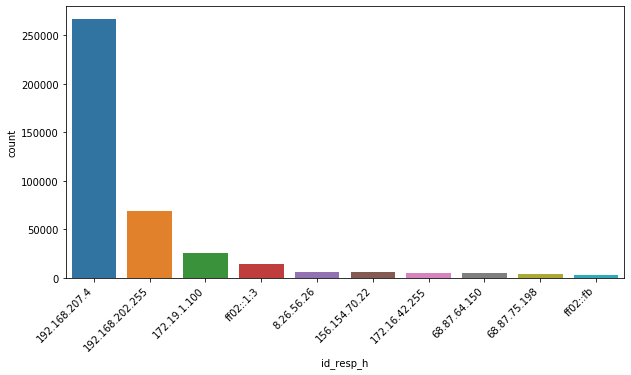

In [32]:
# Take a look at the top 10 response IPs (fat head/chunky middle analysis)
plt.figure(figsize=(10,5))
plot = sns.countplot(x="id_resp_h", data=dns_logs, order=dns_logs['id_resp_h'].value_counts()[:10].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right');

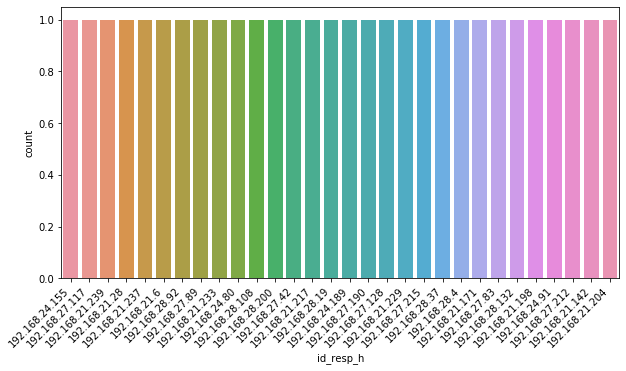

In [33]:
# Take a look at the bottom 30 response IPs (long tail)
plt.figure(figsize=(10,5))
plot = sns.countplot(x="id_resp_h", data=dns_logs, order=dns_logs['id_resp_h'].value_counts()[-30:].index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right');

In [34]:
display(dns_logs)

,ts,uid,id_orig_h,id_orig_p,id_resp_h,id_resp_p,proto,port,query,qclass,...,rcode,rcode_name,QR,AA,TC,RD,Z,answers,TTLs,rejected
0,1.331901e+09,CWGtK431H9XuaTN4fi,192.168.202.100,45658,192.168.27.203,137,udp,33008,*\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\...,1,...,0,NOERROR,F,F,F,F,1,-,-,F\r\n
1,1.331901e+09,C36a282Jljz7BsbGH,192.168.202.76,137,192.168.202.255,137,udp,57402,HPE8AA67,1,...,-,-,F,F,T,F,1,-,-,F\r\n
2,1.331901e+09,C36a282Jljz7BsbGH,192.168.202.76,137,192.168.202.255,137,udp,57402,HPE8AA67,1,...,-,-,F,F,T,F,1,-,-,F\r\n
3,1.331901e+09,C36a282Jljz7BsbGH,192.168.202.76,137,192.168.202.255,137,udp,57402,HPE8AA67,1,...,-,-,F,F,T,F,1,-,-,F\r\n
4,1.331901e+09,C36a282Jljz7BsbGH,192.168.202.76,137,192.168.202.255,137,udp,57398,WPAD,1,...,-,-,F,F,T,F,1,-,-,F\r\n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427930,1.332018e+09,CiZLl44oVCiMvVJgqb,192.168.202.88,58045,192.168.206.44,53,udp,28561,b._dns-sd._udp.0.48.16.172.in-addr.arpa,1,...,5,REFUSED,F,F,T,F,0,-,-,T\r\n
427931,1.332018e+09,CGBRgg3GyzwSHlWkB7,192.168.202.88,58547,192.168.206.44,53,udp,30842,dr._dns-sd._udp.0.202.168.192.in-addr.arpa,1,...,5,REFUSED,F,F,T,F,0,-,-,T\r\n
427932,1.332018e+09,C4zDh93z81GYTldq2k,192.168.202.88,60538,192.168.206.44,53,udp,36843,dr._dns-sd._udp.0.48.16.172.in-addr.arpa,1,...,5,REFUSED,F,F,T,F,0,-,-,T\r\n
427933,1.332018e+09,CQnrcF1yLbtvjQbS8,192.168.202.83,45561,192.168.207.4,53,udp,12572,44.206.168.192.in-addr.arpa,1,...,3,NXDOMAIN,F,F,T,F,0,-,-,F\r\n


In [35]:
dns_logs.describe()

,ts,id_orig_p,id_resp_p,port,Z
count,4.279350e+05,427935.000000,427935.000000,427935.000000,427935.000000
mean,1.331942e+09,37164.762046,301.047236,29525.348946,0.189772
std,3.715467e+04,22575.914482,1078.788544,20146.763478,0.392121
min,1.331901e+09,137.000000,53.000000,0.000000,0.000000
25%,1.331917e+09,19198.000000,53.000000,11101.000000,0.000000
50%,1.331923e+09,47931.000000,53.000000,28625.000000,0.000000
75%,1.331989e+09,56239.000000,53.000000,46913.000000,0.000000
max,1.332018e+09,65535.000000,5355.000000,65535.000000,1.000000


In [38]:
dns_logs.describe(include='all')

,ts,uid,id_orig_h,id_orig_p,id_resp_h,id_resp_p,proto,port,query,qclass,...,rcode,rcode_name,QR,AA,TC,RD,Z,answers,TTLs,rejected
count,4.279350e+05,427935,427935,427935.000000,427935,427935.000000,427935,427935.000000,427935,427935,...,427935,427935,427935,427935,427935,427935,427935.000000,427935,427935,427935
unique,NaN,162496,253,NaN,1230,NaN,2,NaN,5178,4,...,16,16,2,1,2,2,NaN,140,373,2
top,NaN,CHwsqo48JzsgOOx5u5,10.10.117.210,NaN,192.168.207.4,NaN,udp,NaN,teredo.ipv6.microsoft.com,1,...,-,-,F,F,T,F,NaN,-,-,F\r\n
freq,NaN,18622,75943,NaN,266542,NaN,427063,NaN,39273,422339,...,372201,372201,426802,427935,393474,427106,NaN,425958,425958,425858
mean,1.331942e+09,NaN,NaN,37164.762046,NaN,301.047236,NaN,29525.348946,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.189772,NaN,NaN,NaN
std,3.715467e+04,NaN,NaN,22575.914482,NaN,1078.788544,NaN,20146.763478,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.392121,NaN,NaN,NaN
min,1.331901e+09,NaN,NaN,137.000000,NaN,53.000000,NaN,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
25%,1.331917e+09,NaN,NaN,19198.000000,NaN,53.000000,NaN,11101.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
50%,1.331923e+09,NaN,NaN,47931.000000,NaN,53.000000,NaN,28625.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
75%,1.331989e+09,NaN,NaN,56239.000000,NaN,53.000000,NaN,46913.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN


In [28]:
from dga import matsnu

matsnu_domains = [matsnu.generate_domain() for _ in range(2)]


In [29]:
matsnu_domains

['golfwinoperatecareerchip.com', 'financesoundwindowbringrely.com']

In [30]:
dns_logs.loc[dns_logs['id_orig_h'] == '192.168.202.84', 'query'] = matsnu_domains[0]
dns_logs.loc[dns_logs['id_orig_h'] == '192.168.202.88', 'query'] = matsnu_domains[1]


In [31]:
dns_logs.loc[dns_logs['id_orig_h'] == '192.168.202.88', :] 

,ts,uid,id_orig_h,id_orig_p,id_resp_h,id_resp_p,proto,port,query,qclass,...,rcode,rcode_name,QR,AA,TC,RD,Z,answers,TTLs,rejected
242,1.331901e+09,C87hT5PVZG85fFZK1,192.168.202.88,59262,192.168.202.255,137,udp,18438,financesoundwindowbringrely.com,1,...,-,-,F,F,T,F,1,-,-,F\n
243,1.331901e+09,C87hT5PVZG85fFZK1,192.168.202.88,59262,192.168.202.255,137,udp,18438,financesoundwindowbringrely.com,1,...,-,-,F,F,T,F,1,-,-,F\n
244,1.331901e+09,C87hT5PVZG85fFZK1,192.168.202.88,59262,192.168.202.255,137,udp,18438,financesoundwindowbringrely.com,1,...,-,-,F,F,T,F,1,-,-,F\n
260,1.331901e+09,ChUD5Z3IRUoaN9Y3fh,192.168.202.88,54995,192.168.202.255,137,udp,28581,financesoundwindowbringrely.com,1,...,-,-,F,F,T,F,1,-,-,F\n
261,1.331901e+09,ChUD5Z3IRUoaN9Y3fh,192.168.202.88,54995,192.168.202.255,137,udp,28581,financesoundwindowbringrely.com,1,...,-,-,F,F,T,F,1,-,-,F\n
272,1.331901e+09,CmTluP12GANNcNuRH2,192.168.202.88,49179,192.168.202.255,137,udp,28878,financesoundwindowbringrely.com,1,...,-,-,F,F,T,F,1,-,-,F\n
273,1.331901e+09,CmTluP12GANNcNuRH2,192.168.202.88,49179,192.168.202.255,137,udp,28878,financesoundwindowbringrely.com,1,...,-,-,F,F,T,F,1,-,-,F\n
274,1.331901e+09,CmTluP12GANNcNuRH2,192.168.202.88,49179,192.168.202.255,137,udp,28878,financesoundwindowbringrely.com,1,...,-,-,F,F,T,F,1,-,-,F\n
275,1.331901e+09,CJqzWM2QDWMYH5sKLb,192.168.202.88,64600,192.168.202.255,137,udp,25844,financesoundwindowbringrely.com,1,...,-,-,F,F,T,F,1,-,-,F\n
276,1.331901e+09,CJqzWM2QDWMYH5sKLb,192.168.202.88,64600,192.168.202.255,137,udp,25844,financesoundwindowbringrely.com,1,...,-,-,F,F,T,F,1,-,-,F\n


In [33]:
dns_logs.loc[dns_logs['id_orig_h'] == '192.168.202.88', :]

,ts,uid,id_orig_h,id_orig_p,id_resp_h,id_resp_p,proto,port,query,qclass,...,rcode,rcode_name,QR,AA,TC,RD,Z,answers,TTLs,rejected
242,1.331901e+09,C87hT5PVZG85fFZK1,192.168.202.88,59262,192.168.202.255,137,udp,18438,financesoundwindowbringrely.com,1,...,-,-,F,F,T,F,1,-,-,F\n
243,1.331901e+09,C87hT5PVZG85fFZK1,192.168.202.88,59262,192.168.202.255,137,udp,18438,financesoundwindowbringrely.com,1,...,-,-,F,F,T,F,1,-,-,F\n
244,1.331901e+09,C87hT5PVZG85fFZK1,192.168.202.88,59262,192.168.202.255,137,udp,18438,financesoundwindowbringrely.com,1,...,-,-,F,F,T,F,1,-,-,F\n
260,1.331901e+09,ChUD5Z3IRUoaN9Y3fh,192.168.202.88,54995,192.168.202.255,137,udp,28581,financesoundwindowbringrely.com,1,...,-,-,F,F,T,F,1,-,-,F\n
261,1.331901e+09,ChUD5Z3IRUoaN9Y3fh,192.168.202.88,54995,192.168.202.255,137,udp,28581,financesoundwindowbringrely.com,1,...,-,-,F,F,T,F,1,-,-,F\n
272,1.331901e+09,CmTluP12GANNcNuRH2,192.168.202.88,49179,192.168.202.255,137,udp,28878,financesoundwindowbringrely.com,1,...,-,-,F,F,T,F,1,-,-,F\n
273,1.331901e+09,CmTluP12GANNcNuRH2,192.168.202.88,49179,192.168.202.255,137,udp,28878,financesoundwindowbringrely.com,1,...,-,-,F,F,T,F,1,-,-,F\n
274,1.331901e+09,CmTluP12GANNcNuRH2,192.168.202.88,49179,192.168.202.255,137,udp,28878,financesoundwindowbringrely.com,1,...,-,-,F,F,T,F,1,-,-,F\n
275,1.331901e+09,CJqzWM2QDWMYH5sKLb,192.168.202.88,64600,192.168.202.255,137,udp,25844,financesoundwindowbringrely.com,1,...,-,-,F,F,T,F,1,-,-,F\n
276,1.331901e+09,CJqzWM2QDWMYH5sKLb,192.168.202.88,64600,192.168.202.255,137,udp,25844,financesoundwindowbringrely.com,1,...,-,-,F,F,T,F,1,-,-,F\n


In [34]:
dns_logs.loc[dns_logs['id_orig_h'] == '192.168.202.84', :]

,ts,uid,id_orig_h,id_orig_p,id_resp_h,id_resp_p,proto,port,query,qclass,...,rcode,rcode_name,QR,AA,TC,RD,Z,answers,TTLs,rejected
245,1.331901e+09,CujvCH2yBRYfBkELAk,192.168.202.84,58677,192.168.202.255,137,udp,29915,golfwinoperatecareerchip.com,1,...,-,-,F,F,T,F,1,-,-,F\n
246,1.331901e+09,CujvCH2yBRYfBkELAk,192.168.202.84,58677,192.168.202.255,137,udp,29915,golfwinoperatecareerchip.com,1,...,-,-,F,F,T,F,1,-,-,F\n
247,1.331901e+09,CujvCH2yBRYfBkELAk,192.168.202.84,58677,192.168.202.255,137,udp,29915,golfwinoperatecareerchip.com,1,...,-,-,F,F,T,F,1,-,-,F\n
265,1.331901e+09,CRFbLr17mIqibwFRp4,192.168.202.84,57877,192.168.202.255,137,udp,10718,golfwinoperatecareerchip.com,1,...,-,-,F,F,T,F,1,-,-,F\n
268,1.331901e+09,CUCyRCVH9UrMcxLQ9,192.168.202.84,52410,192.168.202.255,137,udp,30508,golfwinoperatecareerchip.com,1,...,-,-,F,F,T,F,1,-,-,F\n
269,1.331901e+09,CUCyRCVH9UrMcxLQ9,192.168.202.84,52410,192.168.202.255,137,udp,30508,golfwinoperatecareerchip.com,1,...,-,-,F,F,T,F,1,-,-,F\n
270,1.331901e+09,CUCyRCVH9UrMcxLQ9,192.168.202.84,52410,192.168.202.255,137,udp,30508,golfwinoperatecareerchip.com,1,...,-,-,F,F,T,F,1,-,-,F\n
271,1.331901e+09,Cw9MCu4DkqDFZonzAj,192.168.202.84,52565,192.168.202.255,137,udp,10679,golfwinoperatecareerchip.com,1,...,-,-,F,F,T,F,1,-,-,F\n
439,1.331901e+09,C5sR8n2l1n2T9ACcR2,192.168.202.84,55516,192.168.207.4,53,udp,63678,golfwinoperatecareerchip.com,1,...,3,NXDOMAIN,F,F,T,F,0,-,-,F\n
440,1.331901e+09,Cdt2833T80yR94gFMf,192.168.202.84,65202,192.168.207.4,53,udp,26152,golfwinoperatecareerchip.com,1,...,3,NXDOMAIN,F,F,T,F,0,-,-,F\n


In [35]:
dns_logs = dns_logs.loc[:, ~dns_logs.columns.str.contains("^Unnamed")]

In [37]:
dns_logs.to_csv("data/dns_logs_demo_two.csv", index=False)